# scNym Cell Type Classification with Cell Atlas References

This notebook trains `scNym` cell type classification models using a relevant cell atlas dataset as training data and an unlabeled dataset from new experiment as target data.

We provide cell atlases for the mouse (Tabula Muris) and rat (Rat Aging Cell Atlas).

We demonstrate scNym by training on young rat cells and predicting on old cells.
Simply change the `UPLOAD_NEW_DATA` variable in the cells below to upload your own experiment instead.

## Install dependencies and import packages

In [ ]:
!pip install tqdm ConfigArgParse numpy torch pandas scanpy matplotlib seaborn mock
!pip install scnym

  Using cached https://files.pythonhosted.org/packages/42/d7/f357d98e9b50346bcb6095fe3ad205d8db3174eb5edb03edfe7c4099576d/tqdm-4.61.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e8/a2/b6947a20b67c64b080b999badd231ff4785d1c709a66cfaf8d5e70811a14/ConfigArgParse-1.4.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/56/74/6fc9dee50f7c93d6b7d9644554bdc9692f3023fa5d1de779666e6bf8ae76/torch-1.8.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/51/51/48f3fc47c4e2144da2806dfb6629c4dd1fa3d5a143f9652b141e979a8ca9/pandas-1.2.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e2/1e/9541172c6a0923fdc522e5bbbee8fdfff5363cec2544c23b24e52c504f9b/scanpy-1.7.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/24/33/5568d443ba438d95d4db635dd69958056f087e57e1026bee56f959d53f9d/matplotlib-3.4.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://fil

You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/7a/8c/f2cb2f01a6b6a21b1c1671b72b0242651048c6e50ecaf35b3793b2f217ec/scnym-0.3.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/5e/68f58d78088cab42dfcaa45c57ad691c025f9b246dda1d76d86a741f12ed/louvain-0.7.0-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/af/0c/4f41bcd45db376e6fe5c619c01100e9b7531c55791b7244815bac6eac32c/tensorboardX-2.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/93/20/a0ac7af93c9312da8ab1b440e26d8f6098670cf0a9c7cbe26a0d14456b67/anndata-0.7.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3f/c0/abde58b837e066bca19a3f7332d9d0493521d7dd6b48248451a9e3fe2214/h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b7/ce/d0b92f0283faa4da76ea82587ff9da70104e81f59ba14f76c87e41962

     |█████████████████████████████▍  | 3.0MB 36.7MB/s eta 0:00:01

     |████████████████████████████████| 3.2MB 36.7MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 36.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/0b/05/9215a7ea1110477bd85375941327857c6a78beb0fbb9d1c2652e28fd04a0/importlib_metadata-4.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/63/23/8b6acd2e9c0b427802dd45aacf0b2a0250893c3b26c7b1340589a588cc2a/natsort-7.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3e/89/7ea760b4daa42653ece2380531c90f64788d979110a2ab51049d92f408af/packaging-20.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/33/34/542152297dcc6c47a9dcb0685eac6d652d878ed3cea83bf2b23cb988e857/Pillow-8.2.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/55/85/70c6602b078bd9e6f3da4f467047e906525c355a4dacd4f71b97a35d9897/joblib-1.0.1-py3-none-any.whl
     |████████████████████████████████| 51kB 2.9MB/s  eta 0:00:01
  Usi

     |████████████████████████████████| 163kB 28.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/7a/b1/52f59dcf31ead2f0ceff8976288449608d912972b911f55dff712cef5719/stdlib_list-0.8.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/30/a6/97f1c2cdaae1355f79d24264d3ddbcbb6ba670f5994c5997b688d5cd10e5/get_version-2.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8d/37/851139d750ed1d88754ff0f69b7bcf83e8a6464207007a9b4a54942302d4/numexpr-2.7.3-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d2/46/231de802ade4225b76b96cffe419cf3ce52bbe92e3b092cf12db7d11c207/kiwisolver-1.3.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
     |████████████████████████████████| 81kB 4.0MB/s  eta 0:00:01
ERROR: tensorboard 2.2.1 has requirement setuptools>=4

In [ ]:
!pip install tensorflow

In [1]:
# allow tensorboard outputs even though TF2 is installed
# broke the tensorboard/pytorch API
import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

In [2]:
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import scnym
import torch

# file downloads
import urllib
import json
import os

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from scnym.api import scnym_api

## Import a new target data set

Here, we import a target data set that will be used as unlabeled data during training.
We transfer labels from the training data set (e.g. cell atlas) to the target data set in a final prediction step.

This tutorial uses a subset of the rat aging cell atlas as a target data set, but we provide code to upload your own target data set below.
We have found that uploading your data to Google Drive and then importing it to Colab tends to work best.
If you would like to upload your own data, we assume data is located in `/gdrive_root/scnym_data/target_data.h5ad`.
You can change this assumption in the code below to match the location of your data.

If you upload your own dataset, please format it into an `anndata.AnnData` object and normalize counts to `log(CPM + 1)` before using your data with `scNym`.
We also recommend that you filter out cells with low library sizes and genes with few measured cells using standard quality control practices (see [Ilicic et. al. 2016, *Genome Biology*](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-016-0888-1) for details).
We have provided typical threshold values in the code below, but these should be adjusted to match the library size distribution and number of cells in your dataset.

An example of how to format your data is included below.

```python
adata = anndata.AnnData(
  X = X, # [Cells, Genes] scipy.sparse.csr_matrix or numpy.ndarray
  var = var, # [Genes, Features] pd.DataFrame with gene names as the index
  obs = obs, # [Cells, Features] pd.DataFrame with cell barcodes as the index
)

sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e6)
sc.pp.log1p(adata)
sc.pp.filter_cells(adata, min_counts=500)
sc.pp.filter_genes(adata, min_cells=10)
```

In [4]:
import torch.nn as nn
import functools
import scipy
from tqdm.notebook import tqdm
import os
import torch
import pickle

In [5]:
class ResnetGenerator(nn.Module):
    """Resnet-based generator that consists of Resnet blocks between a few downsampling/upsampling operations.

    We adapt Torch code and idea from Justin Johnson's neural style transfer project(https://github.com/jcjohnson/fast-neural-style)
    """

    def __init__(self, input_nc, output_nc, ngf=64, norm_layer=nn.BatchNorm2d, use_dropout=False, n_blocks=6, padding_type='reflect'):
        """Construct a Resnet-based generator

        Parameters:
            input_nc (int)      -- the number of channels in input images
            output_nc (int)     -- the number of channels in output images
            ngf (int)           -- the number of filters in the last conv layer
            norm_layer          -- normalization layer
            use_dropout (bool)  -- if use dropout layers
            n_blocks (int)      -- the number of ResNet blocks
            padding_type (str)  -- the name of padding layer in conv layers: reflect | replicate | zero
        """
        assert(n_blocks >= 0)
        super(ResnetGenerator, self).__init__()
        if type(norm_layer) == functools.partial:
            use_bias = norm_layer.func == nn.InstanceNorm2d
        else:
            use_bias = norm_layer == nn.InstanceNorm2d

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=use_bias),
                 norm_layer(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):  # add downsampling layers
            mult = 2 ** i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3, stride=2, padding=1, bias=use_bias),
                      norm_layer(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2 ** n_downsampling
        for i in range(n_blocks):       # add ResNet blocks

            model += [ResnetBlock(ngf * mult, padding_type=padding_type, norm_layer=norm_layer, use_dropout=use_dropout, use_bias=use_bias)]

        for i in range(n_downsampling):  # add upsampling layers
            mult = 2 ** (n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=use_bias),
                      norm_layer(int(ngf * mult / 2)),
                      nn.ReLU(True)]
        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input):
        """Standard forward"""
        return self.model(input)


class ResnetBlock(nn.Module):
    """Define a Resnet block"""

    def __init__(self, dim, padding_type, norm_layer, use_dropout, use_bias):
        """Initialize the Resnet block

        A resnet block is a conv block with skip connections
        We construct a conv block with build_conv_block function,
        and implement skip connections in <forward> function.
        Original Resnet paper: https://arxiv.org/pdf/1512.03385.pdf
        """
        super(ResnetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim, padding_type, norm_layer, use_dropout, use_bias)

    def build_conv_block(self, dim, padding_type, norm_layer, use_dropout, use_bias):
        """Construct a convolutional block.

        Parameters:
            dim (int)           -- the number of channels in the conv layer.
            padding_type (str)  -- the name of padding layer: reflect | replicate | zero
            norm_layer          -- normalization layer
            use_dropout (bool)  -- if use dropout layers.
            use_bias (bool)     -- if the conv layer uses bias or not

        Returns a conv block (with a conv layer, a normalization layer, and a non-linearity layer (ReLU))
        """
        conv_block = []
        p = 0
        if padding_type == 'reflect':
            conv_block += [nn.ReflectionPad2d(1)]
        elif padding_type == 'replicate':
            conv_block += [nn.ReplicationPad2d(1)]
        elif padding_type == 'zero':
            p = 1
        else:
            raise NotImplementedError('padding [%s] is not implemented' % padding_type)

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=p, bias=use_bias), norm_layer(dim), nn.ReLU(True)]
        if use_dropout:
            conv_block += [nn.Dropout(0.5)]

        p = 0
        if padding_type == 'reflect':
            conv_block += [nn.ReflectionPad2d(1)]
        elif padding_type == 'replicate':
            conv_block += [nn.ReplicationPad2d(1)]
        elif padding_type == 'zero':
            p = 1
        else:
            raise NotImplementedError('padding [%s] is not implemented' % padding_type)
        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=p, bias=use_bias), norm_layer(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        """Forward function (with skip connections)"""
        out = x + self.conv_block(x)  # add skip connections
        return out

In [6]:

from collections import OrderedDict
from abc import ABC, abstractmethod
# from . import networks


class BaseModel(ABC):
    """This class is an abstract base class (ABC) for models.
    To create a subclass, you need to implement the following five functions:
        -- <__init__>:                      initialize the class; first call BaseModel.__init__(self, opt).
        -- <set_input>:                     unpack data from dataset and apply preprocessing.
        -- <forward>:                       produce intermediate results.
        -- <optimize_parameters>:           calculate losses, gradients, and update network weights.
        -- <modify_commandline_options>:    (optionally) add model-specific options and set default options.
    """

    def __init__(self, opt):
        """Initialize the BaseModel class.

        Parameters:
            opt (Option class)-- stores all the experiment flags; needs to be a subclass of BaseOptions

        When creating your custom class, you need to implement your own initialization.
        In this function, you should first call <BaseModel.__init__(self, opt)>
        Then, you need to define four lists:
            -- self.loss_names (str list):          specify the training losses that you want to plot and save.
            -- self.model_names (str list):         define networks used in our training.
            -- self.visual_names (str list):        specify the images that you want to display and save.
            -- self.optimizers (optimizer list):    define and initialize optimizers. You can define one optimizer for each network. If two networks are updated at the same time, you can use itertools.chain to group them. See cycle_gan_model.py for an example.
        """
#         self.opt = opt
        self.gpu_ids = [0]
        self.isTrain = False
        self.device = torch.device('cuda:{}'.format(self.gpu_ids[0])) if self.gpu_ids else torch.device('cpu')  # get device name: CPU or GPU
#         self.save_dir = os.path.join(opt.checkpoints_dir, opt.name)  # save all the checkpoints to save_dir
#         if opt.preprocess != 'scale_width':  # with [scale_width], input images might have different sizes, which hurts the performance of cudnn.benchmark.
#             torch.backends.cudnn.benchmark = True
        self.loss_names = []
        self.model_names = ['G_A']
        self.visual_names = []
        self.optimizers = []
        self.image_paths = []
        self.metric = 0  # used for learning rate policy 'plateau'
        self.netG_A = ResnetGenerator(3, 3, n_blocks=9)
        self.netG_B = ResnetGenerator(3, 3, n_blocks=9)

    def __patch_instance_norm_state_dict(self, state_dict, module, keys, i=0):
        """Fix InstanceNorm checkpoints incompatibility (prior to 0.4)"""
        key = keys[i]
        if i + 1 == len(keys):  # at the end, pointing to a parameter/buffer
            if module.__class__.__name__.startswith('InstanceNorm') and \
                    (key == 'running_mean' or key == 'running_var'):
                if getattr(module, key) is None:
                    state_dict.pop('.'.join(keys))
            if module.__class__.__name__.startswith('InstanceNorm') and \
               (key == 'num_batches_tracked'):
                state_dict.pop('.'.join(keys))
        else:
            self.__patch_instance_norm_state_dict(state_dict, getattr(module, key), keys, i + 1)

    def load_networks(self):
        """Load all the networks from the disk.

        Parameters:
            epoch (int) -- current epoch; used in the file name '%s_net_%s.pth' % (epoch, name)
        """
        for name in self.model_names:
            if isinstance(name, str):
                load_path = './pytorch-CycleGAN-and-pix2pix/checkpoints/experiment_name/30_net_G_A.pth'
                net = getattr(self, 'net' + name)
                if isinstance(net, torch.nn.DataParallel):
                    net = net.module
                print('loading the model from %s' % load_path)
                # if you are using PyTorch newer than 0.4 (e.g., built from
                # GitHub source), you can remove str() on self.device
                state_dict = torch.load(load_path, map_location=str(self.device))
                if hasattr(state_dict, '_metadata'):
                    del state_dict._metadata

                # patch InstanceNorm checkpoints prior to 0.4
                for key in list(state_dict.keys()):  # need to copy keys here because we mutate in loop
                    self.__patch_instance_norm_state_dict(state_dict, net, key.split('.'))
                net.load_state_dict(state_dict, strict=False)


In [7]:
def r(x):
    n, embedding_dim = x.shape
    image_dim = (embedding_dim + embedding_dim % 3) // 3
    image_width = int(np.ceil(np.sqrt(image_dim)))
    image_dim = (image_width)**2
    image = torch.zeros((n, image_dim * 3))
    image[:, :embedding_dim] += x
    image = image.reshape(n, 3, image_width, image_width)
    image = torch.nn.functional.pad(input=image, pad=(1, 1, 1, 1))
    return image
def inv_r(x):
    n, C, width, width = x.shape
    x = x[:, :, 1:-1, 1:-1].flatten(1)
    x = x[:, :20117]
    return x

In [8]:
def visualize(adata):
    sc.pp.neighbors(adata)
    sc.tl.pca(adata)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color='cell_ontology_class')

In [9]:
a = BaseModel(None)

In [10]:
a.load_networks()

loading the model from ./pytorch-CycleGAN-and-pix2pix/checkpoints/experiment_name/30_net_G_A.pth


In [11]:
train_adata = anndata.read_h5ad('/dfs/project/CS329D/train_adata_rat.h5ad',)
print('%d cells, %d genes in training data set.' % train_adata.shape)
target_adata = anndata.read_h5ad('/dfs/project/CS329D/target_adata_rat.h5ad',)
print('%d cells, %d genes in training data set.' % target_adata.shape)

72847 cells, 20117 genes in training data set.
146124 cells, 20117 genes in training data set.


In [12]:
train_data = torch.Tensor(scipy.sparse.csr_matrix.toarray(train_adata.X))
# test_data = torch.Tensor(scipy.sparse.csr_matrix.toarray(target_adata.X))

In [65]:
train_dataset = torch.utils.data.TensorDataset(torch.Tensor(train_data))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 256, num_workers = 4)

In [66]:
len(train_loader)

285

In [69]:
output_list = None

In [71]:
for i, train_set in tqdm(enumerate(train_loader)):
    train_set = r(train_set[0])
    output = a.netG_A(train_set)
    output = output.detach().cpu()
    if output_list == None:
        output_list = output
    else:
        output_list = torch.vstack([output_list, output])
with open('30_genA_train_to_target.p', 'wb') as f:
    pickle.dump(output_list, f, protocol=pickle.HIGHEST_PROTOCOL)

In [72]:
output_list.shape

torch.Size([72847, 3, 84, 84])

In [48]:
with open('30_genA_train_to_target.p', 'rb') as handle:
    output_list = pickle.load(handle)

In [49]:
reshaped_output = np.array(inv_r(output_list))

In [50]:
generated_adata = train_adata.copy()
generated_adata.X = reshaped_output

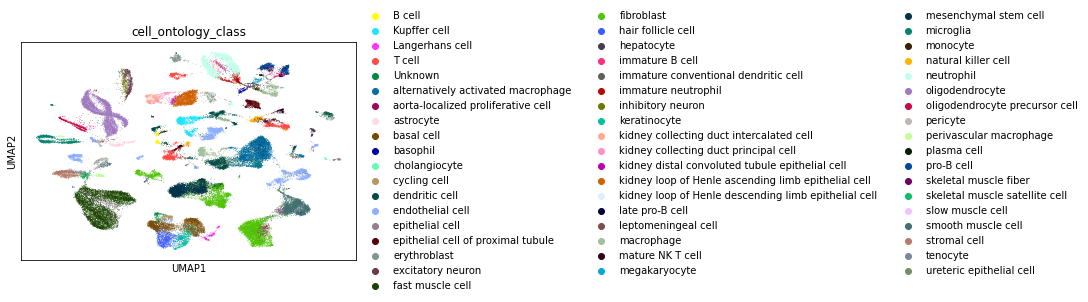

In [22]:
visualize(train_adata)

/dfs/project/CS329D/Parker/CycleGAN/lib/python3.7/site-packages/numba/core/typed_passes.py:314: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../CycleGAN/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/dfs/project/CS329D/Parker/CycleGAN/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../CycleGAN/lib/python3.7/site-package

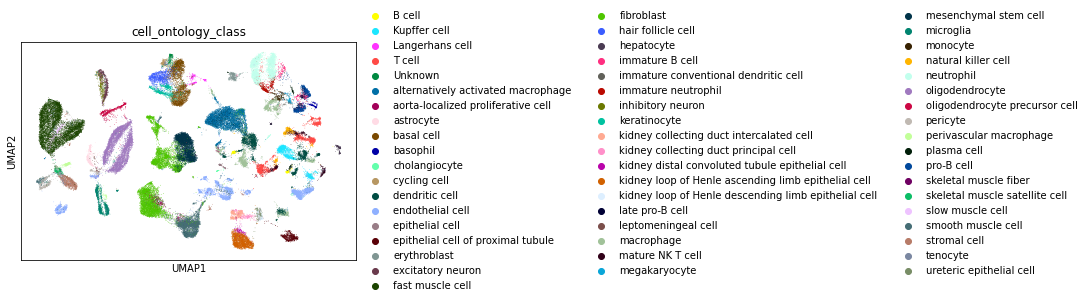

In [76]:
visualize(generated_adata)

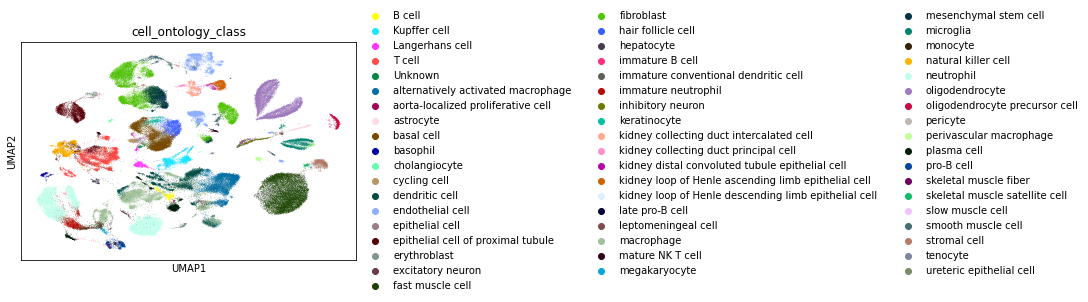

In [28]:
visualize(target_adata)

... storing 'GSM' as categorical
... storing 'age' as categorical


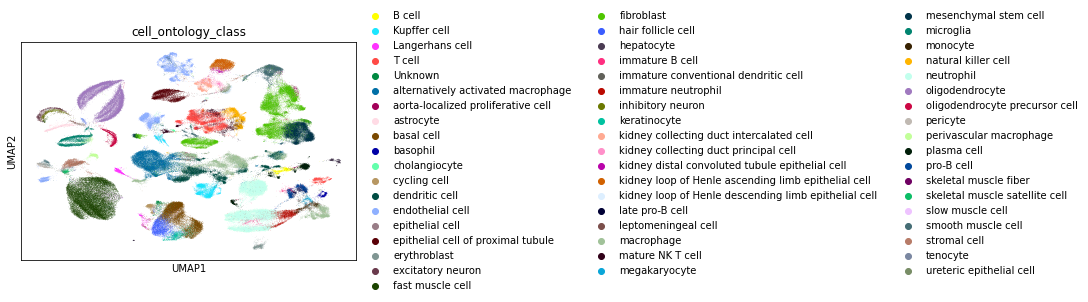

In [37]:
new_adata = sc.concat([train_adata, target_adata])
visualize(new_adata)

/dfs/project/CS329D/Parker/CycleGAN/lib/python3.7/site-packages/numba/core/typed_passes.py:314: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../CycleGAN/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
... storing 'GSM' as categorical
... storing 'age' as categorical


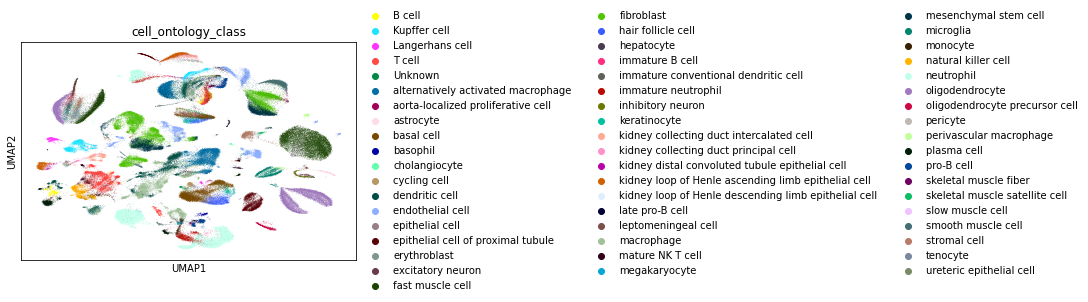

In [77]:
new2_adata = sc.concat([generated_adata, target_adata])
visualize(new2_adata)

In [16]:
x = np.arange(20117).reshape(1, -1)

In [18]:
print(inv_r(r(x)) == x)

False


In [23]:
x

array([[    0,     1,     2, ..., 20114, 20115, 20116]])

In [24]:
inv_r(r(x))

tensor([[0.0000e+00, 1.0000e+00, 2.0000e+00,  ..., 2.0114e+04, 2.0115e+04,
         2.0116e+04]])

In [17]:
x.shape

(1, 20117)

## Train an scNym model

Here, we train an scNym model using the MixMatch semi-supervised learning method to transfer lables from the training data set to the target data set.

## Prepare data for training

The scNym API expects a single `anndata.AnnData` object with a column in `AnnData.obs` defining the annotations to learn.
Cells annotated with the special token `"Unlabeled"` will be treated as part of the target dataset.
These cells will be used for semi-supervised and adversarial training.

In [58]:
train_adata.obs['annotations'] = np.array(
    train_adata.obs['cell_ontology_class']
)
target_adata.obs['annotations'] = 'Unlabeled'

apple_adata = train_adata.concatenate(target_adata)
print('%d cells, %d genes in the joined training and target set.' % adata.shape)

218971 cells, 20117 genes in the joined training and target set.


In [51]:
sc.pp.normalize_total(generated_adata, target_sum=1e6)
sc.pp.log1p(generated_adata)

In [52]:
generated_adata.obs['annotations'] = np.array(
    generated_adata.obs['cell_ontology_class']
)
target_adata.obs['annotations'] = 'Unlabeled'

adata = generated_adata.concatenate(target_adata)
print('%d cells, %d genes in the joined training and target set.' % adata.shape)

218971 cells, 20117 genes in the joined training and target set.


In [75]:
np_adata = adata.X

In [91]:
adata.X = np.where(np.isfinite(np_adata), np_adata, scipy.sparse.csr_matrix.toarray(apple_adata.X)) - np.min(adata.X) + 1

In [92]:
np.min(adata.X)

6.396993

In [86]:
np.isfinite(np.min(adata.X))

True

In [60]:
np.sum(np.abs(generated_adata.X - np.array(train_data)))

NameError: name 'train_data' is not defined

### Train the scNym model

**NOTE:** Training is computationally expensive and many take 1+ hours using the free Colab GPU.
If you'd like to train more models more quickly, consider [connecting Colab to a local runtime with a GPU](https://research.google.com/colaboratory/local-runtimes.html), using [Colab Pro](https://colab.research.google.com/signup?utm_source=faq&utm_medium=link&utm_campaign=why_arent_resources_guaranteed), or downloading this notebook as a Python script and running it on a GPU equipped machine (e.g. in a cluster at your institution).

scNym saves a copy of the best weights determined using early stopping on the validation criterion in `{out_path}/00_best_model_weights.pkl`.
We load the best weights after training is finished to use for prediction on the target dataset.

In [93]:
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)

In [94]:
scnym_api(
    adata=adata,
    task='train',
    groupby='annotations',
    out_path='./scnym_outputs',
    config='no_new_identity',
)

CUDA compute device found.
146124 unlabeled observations found.
Using unlabeled data as a target set for semi-supervised, adversarial training.

training examples:  (72847, 20117)
target   examples:  (146124, 20117)
X:  (72847, 20117)
y:  (72847,)
Not weighting classes and not balancing classes.
Found 2 unique domains.
Using MixMatch for semi-supervised learning
Scaling ICL over 100 epochs, 0 epochs for burn in.
Scaling ICL over 20 epochs, 0 epochs for burn in.
Using a Domain Adaptation Loss.
Training...
Saving best model weights...______________|
Saved best weights.
Trainer has a `dan_criterion`.
Saving DAN weights...
Saving best model weights...______________|
Saved best weights.
Trainer has a `dan_criterion`.
Saving DAN weights...
Saving best model weights...______________|
Saved best weights.
Trainer has a `dan_criterion`.
Saving DAN weights...
Saving best model weights...______________|
Saved best weights.
Trainer has a `dan_criterion`.
Saving DAN weights...
Saving best model weig

## Predict cell types in target data

After training the model, we load the best set of weights selected using early stopping and predict cell types for the target data set.

In [ ]:
!ls scnym_outputs/

00_best_model_weights.pkl   model_weights_080.pkl
01_final_model_weights.pkl  predictions.csv
02_best_dan_weights.pkl     scnym_outputs_log.csv
labels.csv		    scnym_outputs_parameters.json
model_weights_000.pkl	    scnym_train_results.pkl
model_weights_020.pkl	    tblog
model_weights_040.pkl	    test_idx.csv
model_weights_054.pkl	    train_idx.csv
model_weights_060.pkl	    val_idx.csv


In [95]:
scnym_api(
    adata=adata,
    task='predict',
    key_added='scNym',
    config='no_new_identity',
    trained_model='./scnym_outputs'
)

CUDA compute device found.
Loaded model predicting 55 classes from 20117 features
['B cell' 'Kupffer cell' 'Langerhans cell' 'T cell' 'Unknown'
 'alternatively activated macrophage' 'aorta-localized proliferative cell'
 'astrocyte' 'basal cell' 'basophil' 'cholangiocyte' 'cycling cell'
 'dendritic cell' 'endothelial cell' 'epithelial cell'
 'epithelial cell of proximal tubule' 'erythroblast' 'excitatory neuron'
 'fast muscle cell' 'fibroblast' 'hair follicle cell' 'hepatocyte'
 'immature B cell' 'immature conventional dendritic cell'
 'immature neutrophil' 'inhibitory neuron' 'keratinocyte'
 'kidney collecting duct intercalated cell'
 'kidney collecting duct principal cell'
 'kidney distal convoluted tubule epithelial cell'
 'kidney loop of Henle ascending limb epithelial cell'
 'kidney loop of Henle descending limb epithelial cell' 'late pro-B cell'
 'leptomeningeal cell' 'macrophage' 'mature NK T cell' 'megakaryocyte'
 'mesenchymal stem cell' 'microglia' 'monocyte' 'natural killer ce

Finding cell types:   1%|          | 2/214 [00:00<00:15, 13.79it/s]

Gene names match exactly, returning input.
Predicting cell types...


Finding cell types: 100%|██████████| 214/214 [00:14<00:00, 15.17it/s]


Extracting model embeddings...


In [117]:
def get_acc(adata):
    values = np.array(adata.obs['scNym'].values) == np.array(adata.obs['cell_ontology_class'].values)
    acc = np.sum(values)/\
                len(adata)
    print(values.shape)
    return acc, np.std(values, 0) / np.sqrt(values.shape[0]), values

In [118]:
get_acc(adata)

(218971,)


(0.6651565732448589,
 0.0010085316494527032,
 array([ True, False,  True, ...,  True,  True,  True]))

In [100]:
from sklearn.metrics import confusion_matrix


In [104]:
def macro_acc(data):
    true_key = 'scNym'
    key = 'cell_ontology_class'
    matrix = confusion_matrix(y_true=np.array(data.obs[true_key].values), y_pred=np.array(data.obs[key].values))
    accuracy = matrix.diagonal() / matrix.sum(axis=1)
    accuracy = accuracy.mean()
    return accuracy

In [119]:
macro_acc(adata)

/dfs/project/CS329D/Parker/CycleGAN/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


nan

## Plot cell type predictions

In [ ]:
def match_colors(
    adata: anndata.AnnData,
    source_cat: str,
    target_cat: str,
    extend_pal=sns.color_palette('tab20'),
) -> anndata.AnnData:
    '''Match the colors used for common categories across categorical
    variables in a an AnnData object.
    
    Parameters
    ----------
    adata : anndata.AnnData
        [Cells, Genes] with `source_cat` and `target_cat` in `.obs`
        if source colors not present in `.uns[f"{source_cat}_colors"]`,
        they will be added using `extend_pal`.
    source_cat : str
        source categorical with a set of colors to copy.
    target_cat : str
        target categorical that will adopt colors from `source_cat`.
        
    Returns
    -------
    adata : anndata.AnnData
        [Cells, Genes]
    '''
    adata.obs[source_cat] = pd.Categorical(adata.obs[source_cat].tolist())
    if f'{source_cat}_colors' not in adata.uns.keys():
        sc.pl._utils.add_colors_for_categorical_sample_annotation(
            adata,
            source_cat,
            palette=extend_pal,
        )
    
    # define an rgb to hex mapping
    rgb2hex = lambda r,g,b: f'#{r:02x}{g:02x}{b:02x}'
    
    source_colors = adata.uns[f'{source_cat}_colors']
    source_levels = pd.Categorical(adata.obs[source_cat]).categories
    
    source_colors = {
        source_levels[i]: source_colors[i] for i in range(len(source_colors))
    }

    target_levels = pd.Categorical(adata.obs[target_cat]).categories
    target_colors = []
    
    i = 0 # how many keys have we added from the source colors?
    j = 0 # how many colors have we used from the extending palette?
    for target_lev in target_levels:
        if target_lev in source_colors.keys():
            target_colors.append(source_colors[target_lev])
            i += 1
        else:
            idx2get = len(source_colors)+j+1
            target_colors.append(
                rgb2hex(*(np.array(extend_pal[idx2get%len(extend_pal)])*255).astype(np.int))
            )
            j += 1
    adata.uns[f'{target_cat}_colors'] = target_colors
    
    return adata

In [ ]:
target_adata = adata[adata.obs['batch']=='1', :]

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1210: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'GSM' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'age' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'annotations' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'scNym' as categorical


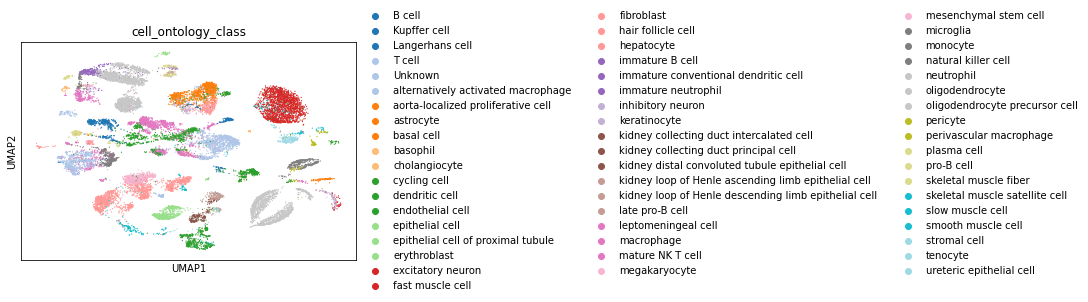

In [ ]:
sc.pl.umap(
    target_adata,
    color='cell_ontology_class',
    palette='tab20',
)

In [ ]:
target_adata = match_colors(
    adata=target_adata,
    source_cat='cell_ontology_class',
    target_cat='scNym',
)

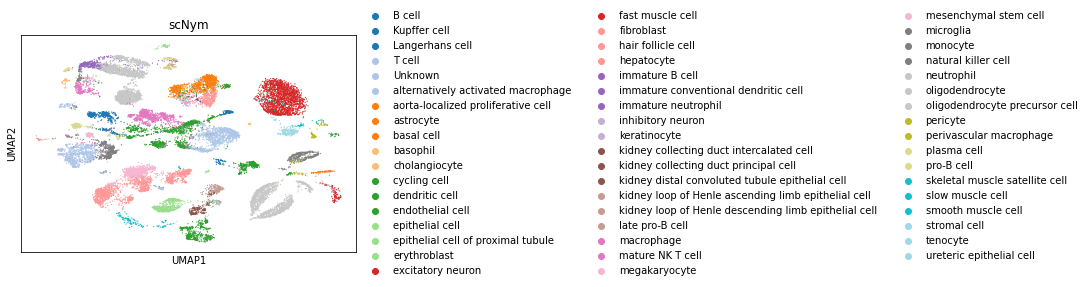

In [ ]:
sc.pl.umap(
    target_adata,
    color='scNym',
)

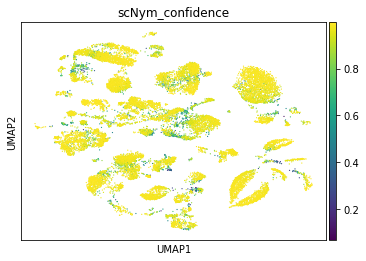

In [ ]:
sc.pl.umap(
  target_adata,
  color='scNym_confidence',
)

## Plot model embeddings

`scnym_api` also extracts the activations of the penultimate neural network layer. These activations represent the embedding learned by the scNym model.

In [ ]:
sc.pp.neighbors(adata, use_rep='X_scnym', n_neighbors=30)

In [ ]:
sc.tl.umap(adata, min_dist=0.3)

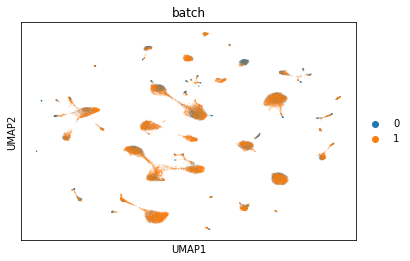

In [ ]:
sc.pl.umap(adata, color='batch', size=5., alpha=0.2)

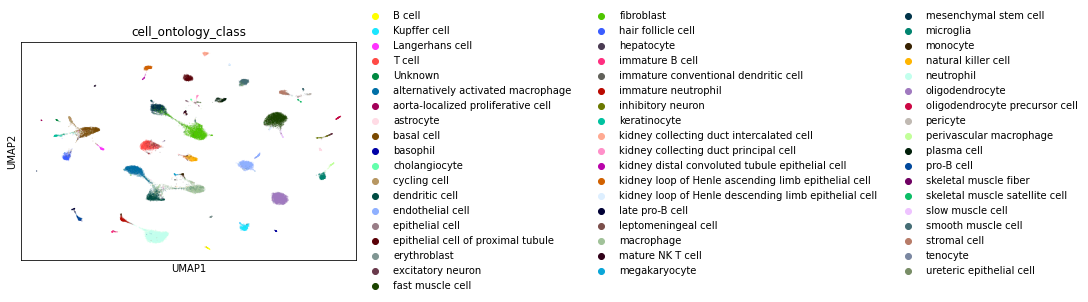

In [ ]:
sc.pl.umap(adata, color='cell_ontology_class', size=5., alpha=0.2)

## Save scNym annotations to locally or to gDrive

In [ ]:
target_adata.obs.to_csv(
    './annotations.csv'
)

In [ ]:
# save files locally
from google.colab import files

files.download('annotations.csv')

In [ ]:
# save files to Google Drive
from google.colab import drive
drive.mount('/gdrive')

# make a directory if not present already
!mkdir "/gdrive/My Drive/scnym/"
# copy file to gDrive
!cp annotations.csv "/gdrive/My Drive/scnym/annotations.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
mkdir: cannot create directory ‘/gdrive/My\\ Drive/scnym/’: No such file or directory
cp: cannot create regular file '/gdrive/My\ Drive/scnym/annotations.csv': No such file or directory
